In [9]:
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

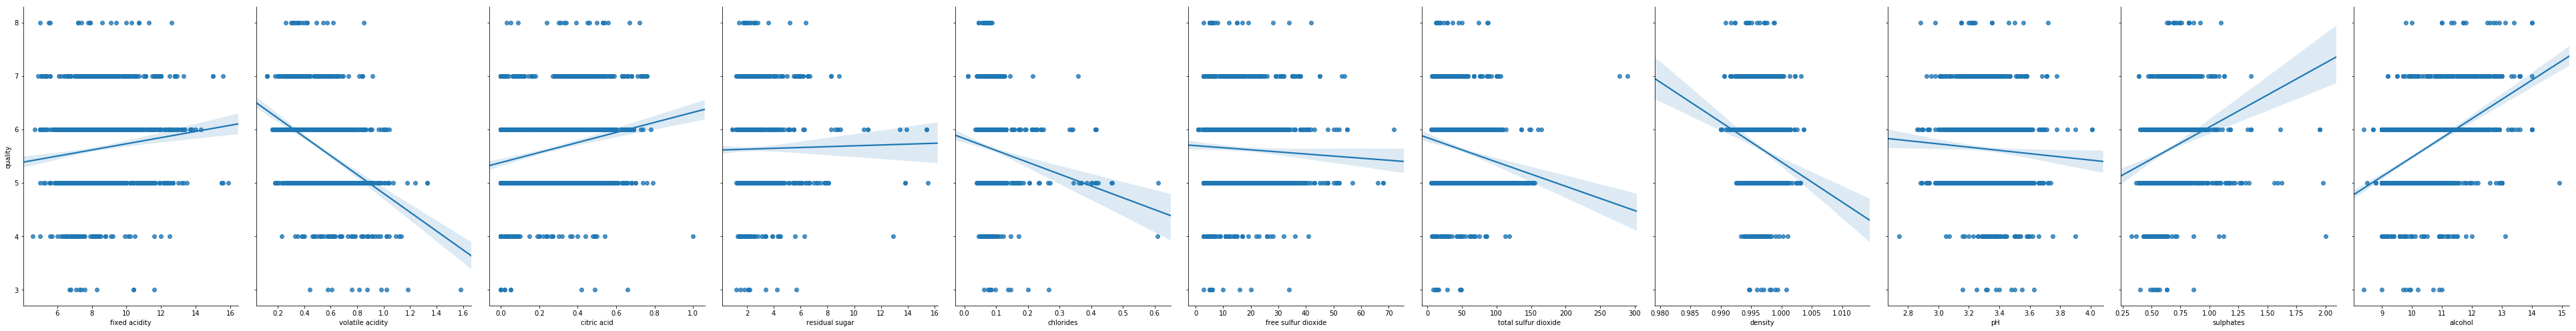

In [10]:
# read in data
data = pd.read_csv('Datasets/winequality-red.csv')

# visualize the relationship between features and response
%matplotlib inline

sns.pairplot(data, x_vars=feature_cols, y_vars='quality', height=7, aspect=0.7, kind='reg')

In [5]:
# preparing X and y
feature_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
X = data[feature_cols]
y = data.quality

# split X and y into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# pair the features with the coefficients (importance of each feature)
zipped = list(zip(linreg.coef_, feature_cols))

# make predictions on test set
y_pred = linreg.predict(X_test)

In [7]:
# Model Evaluation

# MAE
print(metrics.mean_absolute_error(y_test, y_pred))

# MSE
print(metrics.mean_squared_error(y_test, y_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.4801338538605375
0.38658138623755517
0.6217566937617601


### Cross-validation for model evaluation

In [8]:
# 10-fold CV
lr = LinearRegression()
scores = cross_val_score(lr, X, y, cv=10, scoring='neg_mean_squared_error')

mse_scores = -scores
rmse_scores = np.sqrt(mse_scores)

# calculate average MSE
print(mse_scores.mean())

# calculate average RMSE
print(rmse_scores.mean())

0.4351849040300926
0.6586297547378719
